In [1]:
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage,OdaLightCurve
from oda_api.data_products import BinaryData
import os
from astropy.io import fits
import numpy as np
from numpy import sqrt,exp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
source_name='3C 279'
ra=194.046527
dec=-5.789314
radius=10.
Tstart='2003-03-15T00:00:00'
Tstop='2018-03-15T00:00:00'
host='https://www.astro.unige.ch/cdci/astrooda/dispatch-data'
time_bin=10000
Nbibs=16 # number of time bin in the long-term lightcurve
E1_keV=30.
E2_keV=100.

In [3]:
# try: input = raw_input
# except NameError: pass
# token=input() # token for restricted access server
# cookies=dict(_oauth2_proxy=token)
disp=DispatcherAPI(host=host)

In [4]:
disp=DispatcherAPI(host=host)

In [6]:
import requests
url="https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/"
def queryxtime(**args):
    params=Tstart+'/'+Tstop+'?&ra='+str(ra)+'&dec='+str(dec)+'&radius='+str(radius)+'&min_good_isgri=1000'
    print(url+params)
    return requests.get(url+params).json()
#,cookies=cookies

In [7]:
scwlist=queryxtime()
m=len(scwlist)
pointings_osa10=[]
pointings_osa11=[]
for i in range(m):
    if scwlist[i][-2:]=='10':
        if(int(scwlist[i][:4])<1626):
            pointings_osa10.append(scwlist[i]+'.001')
        else:
            pointings_osa11.append(scwlist[i]+'.001')
#else:
#    pointings=np.genfromtxt('scws_3C279_isgri_10deg.txt', dtype='str')
m_osa10=len(pointings_osa10)
m_osa11=len(pointings_osa11)

https://www.astro.unige.ch/cdci/astrooda/dispatch-data/gw/timesystem/api/v1.0/scwlist/cons/2003-03-15T00:00:00/2018-03-15T00:00:00?&ra=194.046527&dec=-5.789314&radius=10.0&min_good_isgri=1000


In [23]:
scw_lists_osa10=[]
scw_lists_osa11=[]
count=0
scw_string=''
for i in range(m_osa10):
    if count<50:
        scw_string=scw_string+str(pointings_osa10[i])+','
        count+=1
    else:
        scw_lists_osa10.append(scw_string[:-1])
        count=1
        scw_string=str(pointings_osa10[i])+','
scw_lists_osa10.append(scw_string[:-1])
print(len(scw_lists_osa10))
count=0
scw_string=''
for i in range(m_osa11):
    if count<50:
        scw_string=scw_string+str(pointings_osa11[i])+','
        count+=1
    else:
        scw_lists_osa11.append(scw_string[:-1])
        count=0
        scw_string=str(pointings_osa11[i])+','
scw_lists_osa11.append(scw_string[:-1])
print(len(scw_lists_osa11))

22
2


In [9]:
print(scw_lists_osa10[20]+','+scw_lists_osa10[21])

123500420010.001,123500430010.001,123600270010.001,123600280010.001,123600350010.001,123600360010.001,123600370010.001,124200040010.001,124200120010.001,124200130010.001,124200140010.001,124200530010.001,124200540010.001,124200620010.001,124200630010.001,124200640010.001,124300540010.001,137000590010.001,137000600010.001,138200600010.001,138200610010.001,149000230010.001,149000240010.001,149700080010.001,149800050010.001,149800550010.001,149800560010.001,150000430010.001,150000440010.001,155000180010.001,155300170010.001,155300210010.001,155300300010.001,156300540010.001,156300550010.001,156300610010.001,156300620010.001,156300630010.001,156300640010.001,156300650010.001,156300660010.001,156300670010.001,156400030010.001,156400040010.001,156400050010.001,156400060010.001,156400070010.001,156400080010.001,156400140010.001,156400150010.001,156500330010.001,156500340010.001,156600370010.001,156600380010.001


In [10]:
data=disp.get_product(instrument='isgri',
                      product='isgri_image',
                      scw_list=scw_lists_osa10[0],
                      E1_keV=E1_keV,
                      E2_keV=E2_keV,
                      osa_version='OSA10.2',
                      RA=ra,
                      DEC=dec,
                      detection_threshold=3.5,
                      product_type='Real')

007700160010.001,007700170010.001,007700180010.001,007700190010.001,007700200010.001,007700210010.001,007700220010.001,007700230010.001,007700240010.001,007700250010.001,007700260010.001,007700270010.001,007700280010.001,007700290010.001,007700300010.001,007700310010.001,007700320010.001,007700330010.001,007700340010.001,007700350010.001,007700360010.001,007700370010.001,007700380010.001,007700390010.001,007700400010.001,007700410010.001,007700460010.001,007700470010.001,007700480010.001,007700490010.001,007700500010.001,007700510010.001,007700520010.001,007700530010.001,007700540010.001,007700550010.001,007700560010.001,007700570010.001,007700580010.001,007700590010.001,007700600010.001,007700660010.001,007700670010.001,007800020010.001,007800030010.001,007800040010.001,007800050010.001,007800060010.001,007800070010.001,007800080010.001
waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
the job has been submitted on the remote 

In [11]:
data.dispatcher_catalog_1.table

meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str18,float64,float64,float64,int64,int64,int64,float64
1,3C 273,12.098819732666016,187.2660675048828,2.045917510986328,-32768,2,0,0.0002800000074785203
30,IGR J12391-1612,4.082015037536621,189.77621459960938,-16.179750442504883,-32768,2,0,0.00016999999934341758
50,NGC 4593,13.66150951385498,189.91522216796875,-5.358253479003906,-32768,2,0,0.0002800000074785203
112,SWIFT J1238.6+0928,4.295688629150391,189.67724609375,9.474955558776855,-32768,1,0,0.07566666603088379


In [12]:
FLAG=0
torm=[]
for ID,n in enumerate(data.dispatcher_catalog_1.table['src_names']):
    if(n[0:2]=='NEW'):
        torm.append(ID)
    if(n==source_name):
        FLAG=1
data.dispatcher_catalog_1.table.remove_rows(torm)
nrows=len(data.dispatcher_catalog_1.table['src_names'])

In [13]:
if FLAG==0:
    data.dispatcher_catalog_1.table.add_row()
    data.dispatcher_catalog_1.table['src_names'][nrows]='3C 279'
    data.dispatcher_catalog_1.table['ra'][nrows]=ra
data.dispatcher_catalog_1.table['dec'][nrows]=dec
data.dispatcher_catalog_1.table['ISGRI_FLAG'][nrows]=2

data.dispatcher_catalog_1.table


meta_ID,src_names,significance,ra,dec,NEW_SOURCE,ISGRI_FLAG,FLAG,ERR_RAD
,,,deg,deg,,,,
int64,str18,float64,float64,float64,int64,int64,int64,float64
1,3C 273,12.098819732666016,187.2660675048828,2.045917510986328,-32768,2,0,0.0002800000074785203
30,IGR J12391-1612,4.082015037536621,189.77621459960938,-16.179750442504883,-32768,2,0,0.00016999999934341758
50,NGC 4593,13.66150951385498,189.91522216796875,-5.358253479003906,-32768,2,0,0.0002800000074785203
112,SWIFT J1238.6+0928,4.295688629150391,189.67724609375,9.474955558776855,-32768,1,0,0.07566666603088379
0,3C 279,0.0,194.046527,-5.789314,0,2,0,0.0


In [14]:
api_cat=data.dispatcher_catalog_1.get_api_dictionary()

In [25]:
lc_results=[]
for i in range(len(scw_lists_osa10)):
    print(i)
    data=disp.get_product(instrument='isgri',
                        product='isgri_lc',
                        scw_list=scw_lists_osa10[i],
                        E1_keV=E1_keV,
                        E2_keV=E2_keV,
                        osa_version='OSA10.2',
                        RA=ra,
                        DEC=dec,
                        time_bin=time_bin,
                        selected_catalog=api_cat)
    lc_results.append(data)
    


0
007700160010.001,007700170010.001,007700180010.001,007700190010.001,007700200010.001,007700210010.001,007700220010.001,007700230010.001,007700240010.001,007700250010.001,007700260010.001,007700270010.001,007700280010.001,007700290010.001,007700300010.001,007700310010.001,007700320010.001,007700330010.001,007700340010.001,007700350010.001,007700360010.001,007700370010.001,007700380010.001,007700390010.001,007700400010.001,007700410010.001,007700460010.001,007700470010.001,007700480010.001,007700490010.001,007700500010.001,007700510010.001,007700520010.001,007700530010.001,007700540010.001,007700550010.001,007700560010.001,007700570010.001,007700580010.001,007700590010.001,007700600010.001,007700660010.001,007700670010.001,007800020010.001,007800030010.001,007800040010.001,007800050010.001,007800060010.001,007800070010.001,007800080010.001
waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data


query done succesfully!
1
00780009001

the job has been submitted on the remote server
 / the job is working remotely, please wait status=done - job_id=-4683985688443885335  35  

query done succesfully!
8
039800420010.001,039800430010.001,039800440010.001,039800450010.001,039800460010.001,039800470010.001,039800480010.001,039800490010.001,039800500010.001,039800510010.001,039800520010.001,039800530010.001,039800540010.001,039800550010.001,039800560010.001,039800570010.001,039800580010.001,039800590010.001,039800600010.001,039800610010.001,039800620010.001,039800630010.001,039800640010.001,039800650010.001,039800660010.001,039800670010.001,039800680010.001,039800690010.001,039900010010.001,039900020010.001,039900030010.001,039900040010.001,039900050010.001,039900060010.001,039900070010.001,039900080010.001,039900090010.001,039900100010.001,039900110010.001,039900120010.001,039900130010.001,039900140010.001,039900150010.001,039900160010.001,039900170010.001,039900180010.001,039900190010.001,039900200010.001,039900210010.001,

the job has been submitted on the remote server
 \ the job is working remotely, please wait status=done - job_id=-1521304803791612634  34  

query done succesfully!
16
083000580010.001,083000590010.001,083000600010.001,083000610010.001,087600050010.001,087600060010.001,087600070010.001,087600470010.001,087600550010.001,087600560010.001,087600570010.001,087600580010.001,087800370010.001,087800450010.001,087800460010.001,087800470010.001,087800480010.001,087900250010.001,087900260010.001,087900270010.001,087900340010.001,087900350010.001,087900360010.001,088000130010.001,088000140010.001,088000150010.001,088000220010.001,088000230010.001,088000240010.001,088200590010.001,092900080010.001,092900090010.001,092900100010.001,092900170010.001,092900180010.001,092900190010.001,093000260010.001,093000270010.001,093000280010.001,093000350010.001,093000360010.001,093000370010.001,093000380010.001,093100190010.001,093100200010.001,093100210010.001,093100280010.001,093100290010.001,093100300010.001

In [26]:
lc_results1=[]
for i in range(len(scw_lists_osa11)):
    print(i)
    data=disp.get_product(instrument='isgri',
                        product='isgri_lc',
                        scw_list=scw_lists_osa11[i],
                        E1_keV=E1_keV,
                        E2_keV=E2_keV,
                        osa_version='OSA11.0',
                        RA=ra,
                        DEC=dec,
                        time_bin=time_bin,
                        selected_catalog=api_cat)
    lc_results1.append(data)



0
169500140010.001,169500150010.001,169500210010.001,169500220010.001,169500230010.001,169500240010.001,169500250010.001,169500260010.001,169500270010.001,169900840010.001,169900850010.001,175400370010.001,176000060010.001,176100050010.001,176200040010.001,176200050010.001,176200450010.001,176300030010.001,176300040010.001,176400060010.001,176400460010.001,176400470010.001,176500360010.001,176500450010.001,176500460010.001,182000220010.001,182000310010.001,182100250010.001,182100340010.001,182200220010.001,182200230010.001,182200240010.001,182200320010.001,182300600010.001,182400030010.001,182400430010.001,182400440010.001,182800300010.001,182800400010.001,183200120010.001,183200130010.001,183200190010.001,183200200010.001,183200210010.001,183200220010.001,183200230010.001,183200240010.001,183200250010.001,183200290010.001,183200300010.001
waiting for remote response, please wait run_analysis https://www.astro.unige.ch/cdci/astrooda/dispatch-data
the job has been submitted on the remot

In [27]:
t=[]
r=[]
err=[]
tot_counts=[]
backv=[]
backe=[]
i=0
for lc in lc_results:
    for ID,s in enumerate(lc._p_list):
        if s.meta_data['src_name']==source_name:
            i=i+1
            for tt in s.data_unit[1].data['TIME']:
                t.append(tt)
            for rr in s.data_unit[1].data['RATE']:
                r.append(rr)
            for ee in s.data_unit[1].data['ERROR']:
                err.append(ee)
            for tc in s.data_unit[1].data['TOT_COUNTS']:
                tot_counts.append(tc)
            for bv in s.data_unit[1].data['BACKV']:
                backv.append(bv)
            for be in s.data_unit[1].data['BACKE']:
                backe.append(be)
for lc in lc_results1:
    for ID,s in enumerate(lc._p_list):
        if s.meta_data['src_name']==source_name:
            i=i+1
            for tt in s.data_unit[1].data['TIME']:
                t.append(tt)
            for rr in s.data_unit[1].data['RATE']:
                r.append(rr)
            for ee in s.data_unit[1].data['ERROR']:
                err.append(ee)
            for tc in s.data_unit[1].data['TOT_COUNTS']:
                tot_counts.append(tc)
            for bv in s.data_unit[1].data['BACKV']:
                backv.append(bv)
            for be in s.data_unit[1].data['BACKE']:
                backe.append(be)

t=np.array(t)
r=np.array(r)
err=np.array(err)
tot_counts=np.array(tot_counts)
backv=np.array(backv)
backe=np.array(backe)

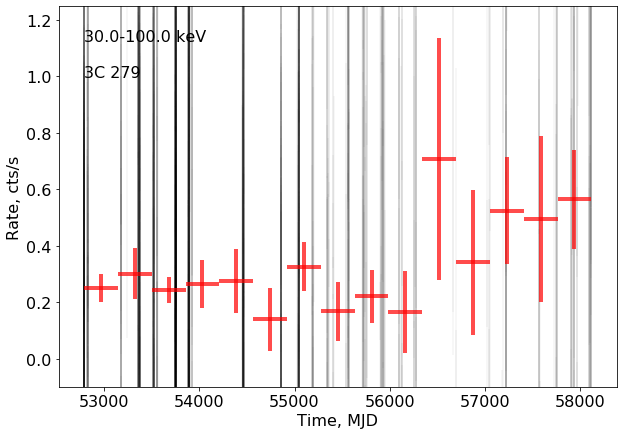

In [29]:
fig = plt.figure(figsize=(10,7))
t0=51544
Nbins=16
tmin=t0+t[0]
tmax=t0+t[-1]
time=np.linspace(tmin,tmax,Nbins)
dtime=time[1]-time[0]
time_av=time-dtime/2.
flux=np.zeros(Nbins)
error=np.zeros(Nbins)
j=0
sc=1.

k=0
while (j<len(time)):
    while ((t[k]+t0<time[j])):
        if (err[k]>0.):
            flux[j]=flux[j]+r[k]/(err[k])**2
            error[j]=error[j]+1./(err[k])**2
        k=k+1
        if (k==len(t)):
            break
    if (k==len(t)):
        break
    else:
        j=j+1
plt.errorbar(t+t0,r*exp((t+t0-52900)/40000.),yerr=err*exp((t+t0-52900)/40000.),linestyle='none',color='black',alpha=0.03,linewidth=2)

for i in range(len(flux)):
    if(error[i]>0.):
        flux[i]=flux[i]/(error[i])*exp((time_av[i]-52900)/40000.)
        error[i]=1./sqrt(error[i])*exp((time_av[i]-52900)/40000.)
ind=error>0
plt.errorbar(time_av[ind],flux[ind],yerr=error[ind],xerr=dtime/2.,
             linestyle='none',color='red',alpha=0.7,linewidth=4)
#plt.plot(time_av,exp((time_av-52900)/40000.)/2)
plt.tick_params(axis='both', which='major', labelsize=16)
ymax=1.1*max(flux+error)
plt.ylim(-0.1,ymax)
plt.xlabel('Time, MJD',fontsize=16)
plt.ylabel('Rate, cts/s',fontsize=16)
plt.text(tmin,0.9*ymax, str(E1_keV)+'-'+str(E2_keV)+' keV',fontsize=16)
plt.text(tmin,0.8*ymax, source_name,fontsize=16)

name=source_name.replace(" ", "")
plt.savefig(name+'_lc.pdf',format='pdf',dpi=100)




In [65]:
lc_3C279=name+'_lc.pdf'